In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
    
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [19]:
auto=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/Lab 3/Program 2/Auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#### 1. Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [20]:
import statistics

#getting the median
mpg_median=statistics.median(auto["mpg"])
mpg_median



23.0

In [22]:
#creating mpg_01

#0's first
mpg01=[]
for i in range(0,len(auto)):
    mpg01.append(0)

#converting to dataframe    
mpg01=pd.DataFrame(mpg01)
mpg01.rename(columns = {0:'mpg01'}, inplace = True)

#adding mpg01 and removing mpg
auto1=pd.concat([auto, mpg01], axis=1)
auto1

#changing to 1 where necesary
auto1["mpg01"] = np.where(auto1["mpg"]>23 , 1, 0)
auto1

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


#### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

<Figure size 300x400 with 0 Axes>

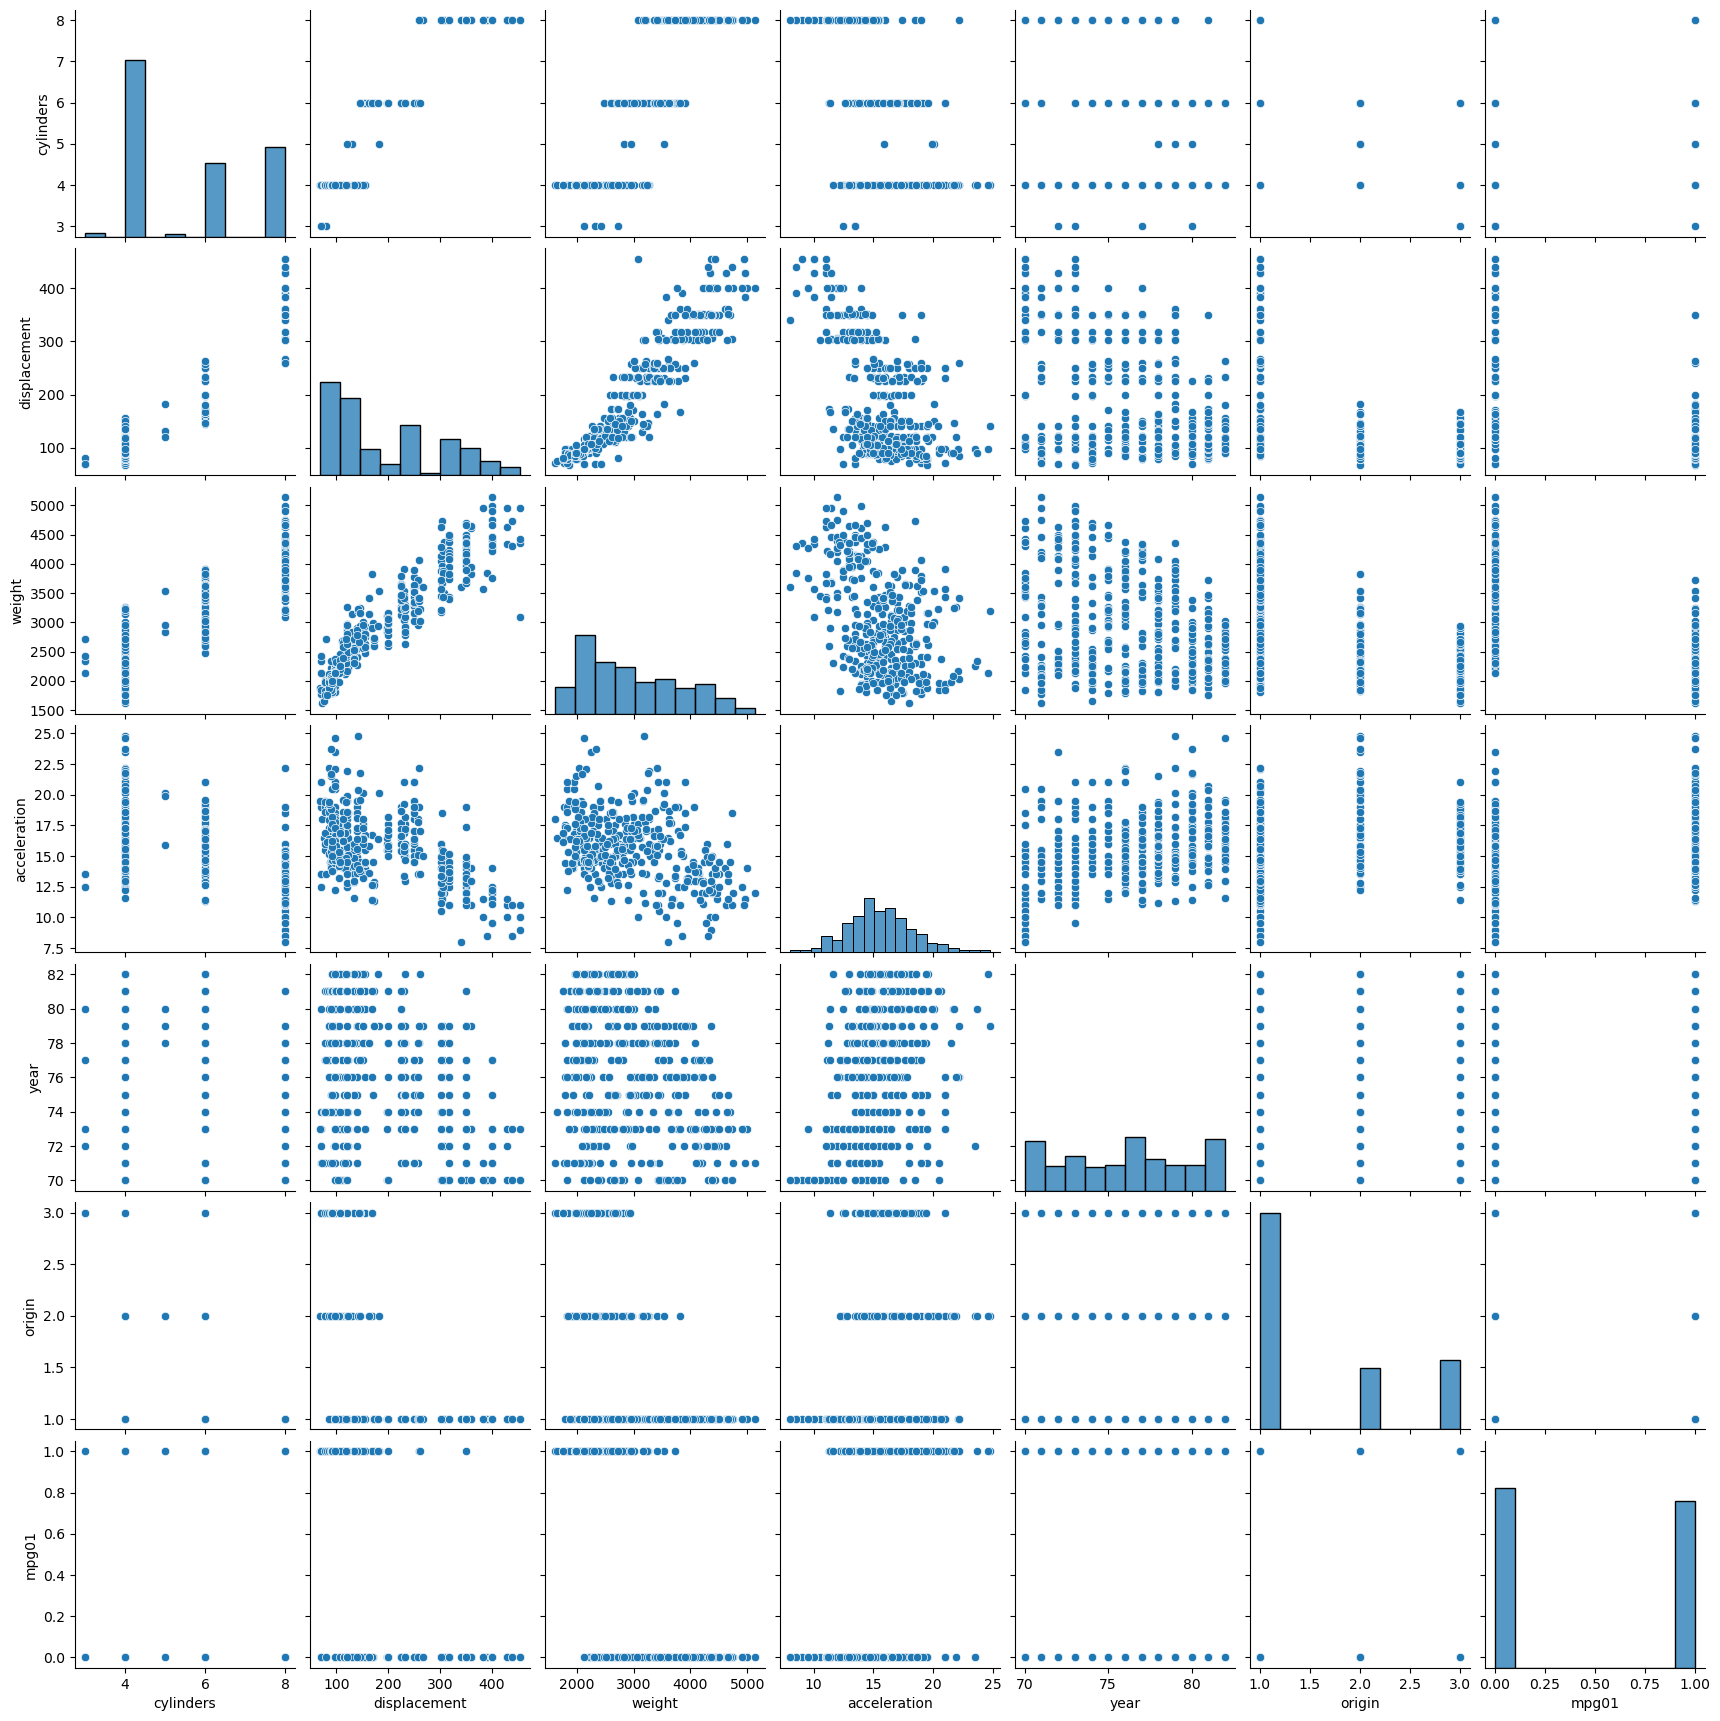

In [24]:
#removing 'name' and 'mpg'
auto2=auto1.drop(['mpg', 'name'],axis=1)

#Getting a Scatter plot 
plt.figure(figsize=(3,4))
pair=sns.pairplot(auto2)
plt.show(pair)


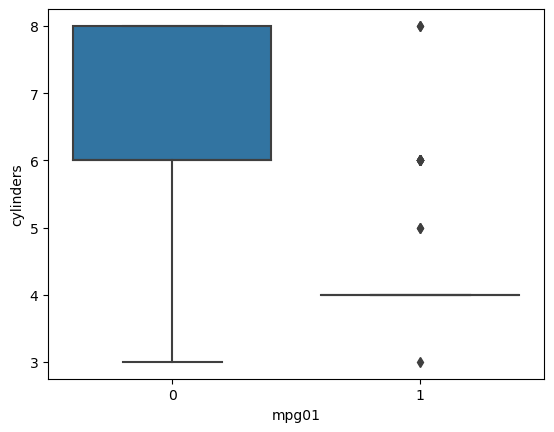

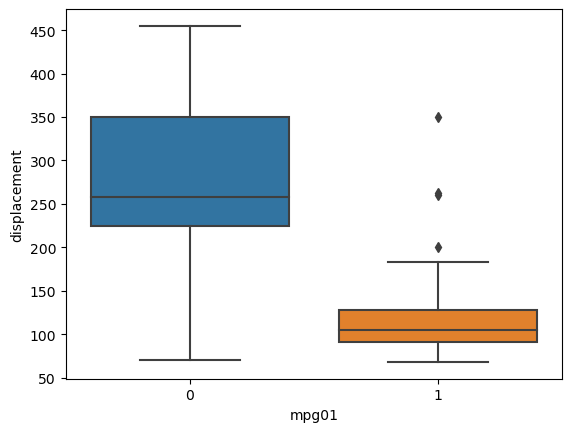

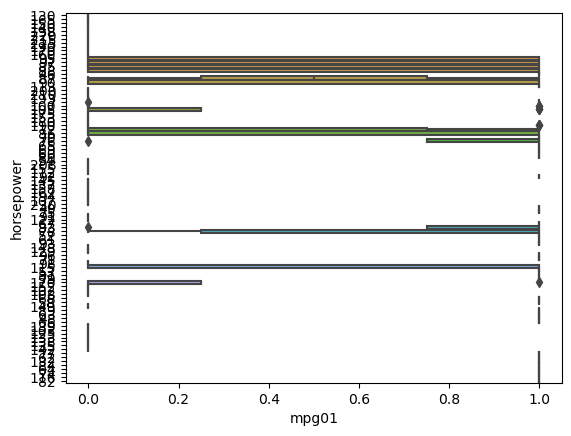

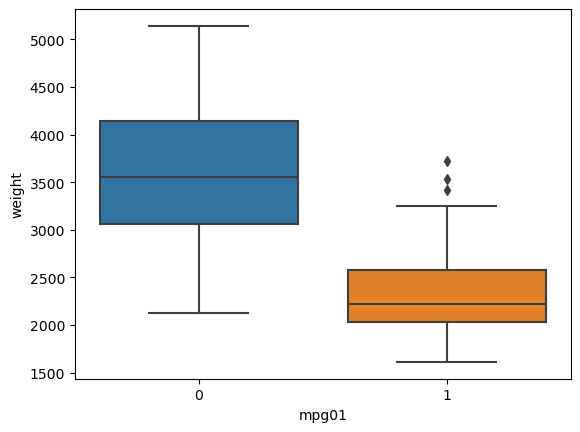

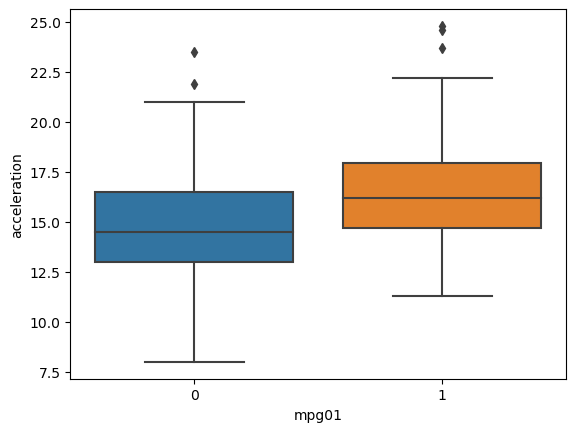

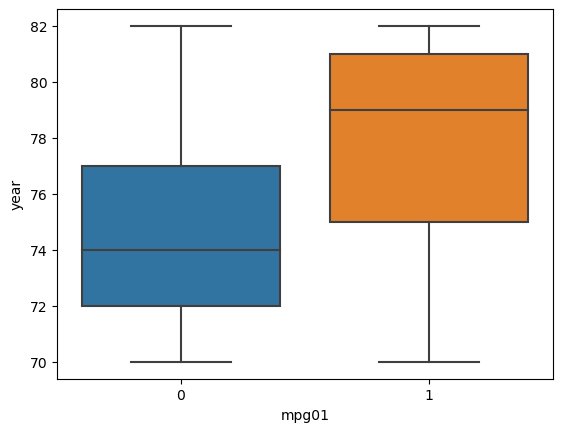

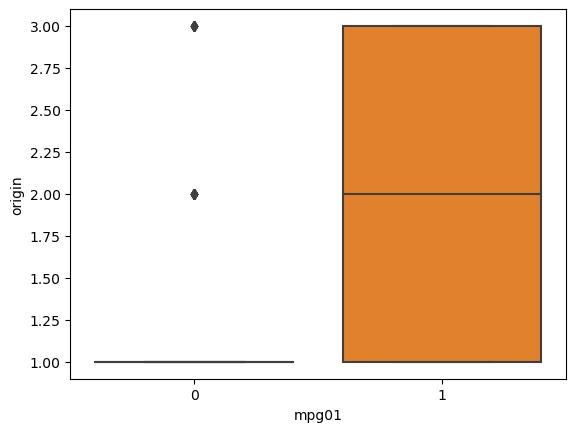

In [25]:
#boxplots
for i in auto2.columns.drop(['mpg01']):
    a=sns.boxplot(x=auto2['mpg01'], y=auto2[i])
    plt.show(a);

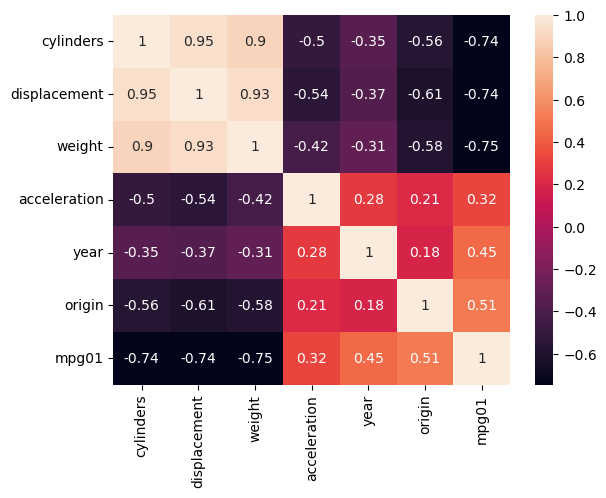

In [26]:
#heatmap
heat=sns.heatmap(auto2.corr(),annot=True)
plt.show(heat)

Conclusion: We see that Displacement, Weight and Cylinder have high correlation with mpg01 and hence can be considered to create a model

#### (c) Split the data into a training set and a test set.

In [43]:
from sklearn.model_selection import train_test_split

#Regressors
#X=auto2.loc[:,auto2.columns!="mpg01"]\
X=auto2[["displacement","weight","cylinders"]]

#Response
y=auto2["mpg01"]

#Splitting into train and test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

X_train
X_test

,displacement,weight,cylinders
174,171.0,2984,6
359,141.0,3230,4
250,318.0,3735,8
274,131.0,2830,5
283,232.0,3265,6
...,...,...,...
382,91.0,1965,4
39,400.0,4464,8
171,134.0,2702,4
271,156.0,2745,4


#### 4) a)Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?


In [50]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
model=LogisticRegression().fit(X_train,y_train)

#predicting
y_pred=model.predict(X_test)

#output
pd.DataFrame({"Y predicted":y_pred})

,Y predicted
0,0
1,0
2,0
3,1
4,0
...,...
115,1
116,0
117,1
118,1


In [49]:
#TEST ERROR
#PREDICTED Y USING TEST DATA - ACTUAL Y IN TEST DATA

test_error=y_pred-y_test
Error=pd.DataFrame({"Test Error":test_error})

#printing
Error

,Test Error
174,0
359,-1
250,0
274,1
283,0
...,...
382,0
39,0
171,0
271,0


# Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(y_test,y_pred)
conf


array([[54,  8],
       [ 8, 50]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

#Conclusion:We can say that the model correctly predicted the results 86.66% of the time.

0.8666666666666667

In [60]:
#Sensitivity = TP / (TP + FN)

54/(54+8)

#CONCLUSION: Therefore 87.09% of the ACTUAL mpg01 were correctly predicted as such

0.8709677419354839

In [61]:
#Specificity = TN / (FP + TN)

50/(50+8)
#CONCLUSION: Therefore 86.2% of the ACTUAL mpg01 here correctly predicted as such

0.8620689655172413